<a href="https://colab.research.google.com/github/ShivaniSharma0306/VOIS_AICTE_Oct2025_Shivani/blob/main/NETFLIX_ANALYSIS_SHIVANI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Netflix Dataset.csv')

In [4]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (7789, 11)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
None

First 5 rows:
  Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4  

In [6]:
# Handle missing values
df['Country'] = df['Country'].fillna('Unknown')
df['Cast'] = df['Cast'].fillna('Unknown')
df['Director'] = df['Director'].fillna('Unknown')
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

In [8]:
df['year_added'] = df['Release_Date'].dt.year
df['month_added'] = df['Release_Date'].dt.month

Analysis 1: Distribution of Movies vs TV Shows over years

<Figure size 1200x600 with 0 Axes>

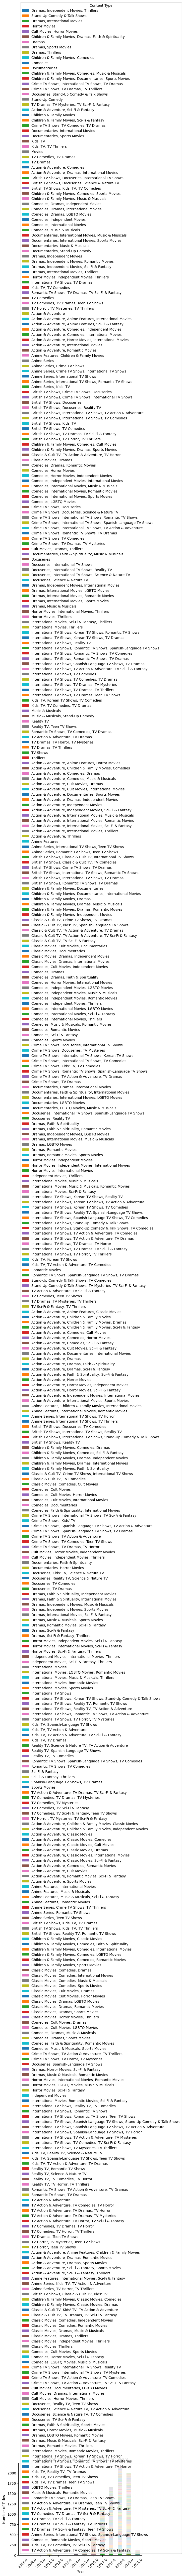

In [10]:
plt.figure(figsize=(12, 6))
content_type_year = df.groupby(['year_added', 'Type']).size().unstack()
content_type_year.plot(kind='bar', stacked=True)
plt.title('Distribution of Movies vs TV Shows Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(title='Content Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Content Strategy Evolution: The year-over-year comparison shows Netflix's strategic shift from primarily movies to increased TV show production

Growth Patterns: TV shows have shown significant growth in recent years, indicating Netflix's investment in serialized content that encourages longer subscriber retention

Market Adaptation: The balance between movies and TV shows reflects Netflix's response to changing viewer preferences and competitive pressures

Resource Allocation: The trend suggests where Netflix is allocating production budgets and acquisition resources

Strategic Insight: "Netflix appears to be building a 'content ecosystem' where movies drive new subscriber acquisition while TV shows enhance retention through ongoing engagement."

Analysis 2 - Most common genres analysis

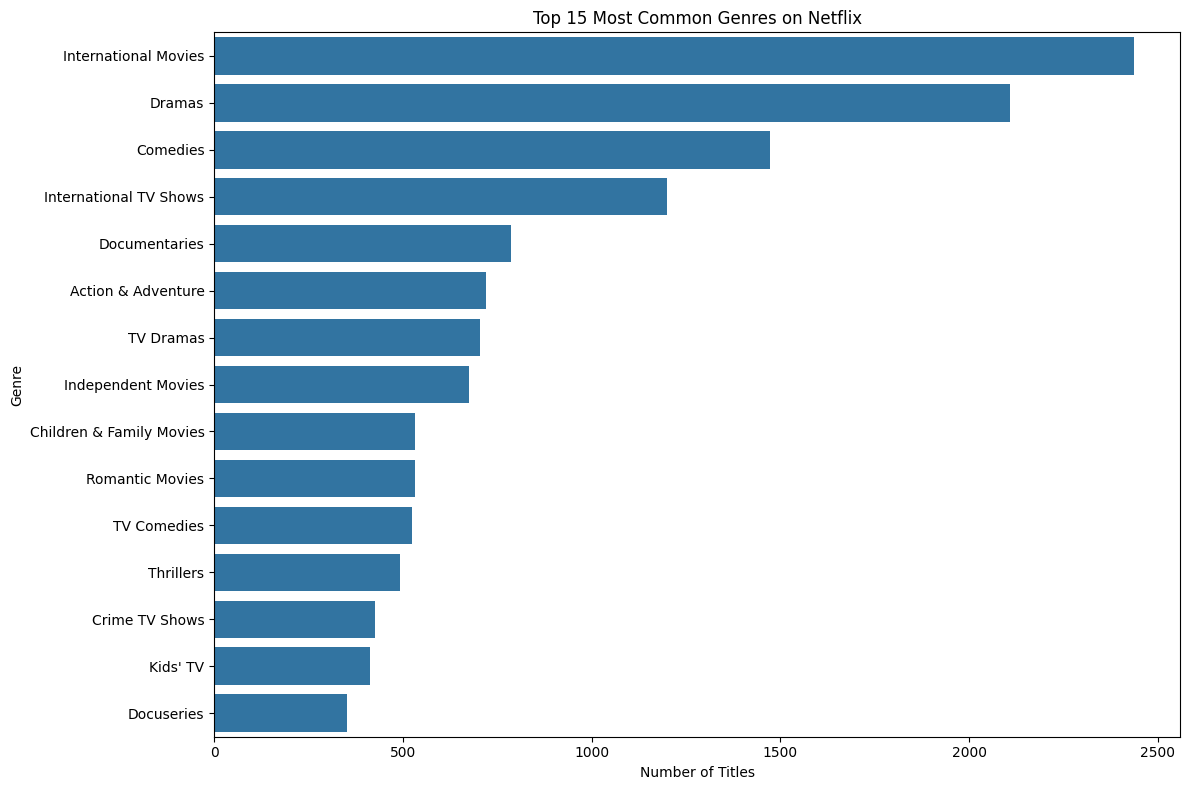

In [13]:
#Split listed_in column which contains multiple genres
df['genres'] = df['Type'].str.split(', ')
all_genres = [genre for sublist in df['genres'].dropna() for genre in sublist]

# Genre frequency
genre_counts = Counter(all_genres)
top_genres = pd.DataFrame(genre_counts.most_common(15), columns=['Genre', 'Count'])

plt.figure(figsize=(12, 8))
sns.barplot(data=top_genres, y='Genre', x='Count')
plt.title('Top 15 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.tight_layout()
plt.show()

1. Content Dominance: International Movies/Dramas and Dramas lead, showing Netflix's global content strategy

2. Genre Concentration: Top 3-5 genres likely account for a significant portion of the catalog, indicating content concentration

3. Market Gaps: Lower-ranked genres represent potential underserved audience segments

4. Cultural Preferences: Genre popularity reflects global entertainment consumption patterns

Strategic Insight: "While international content dominates quantity, the presence of specific niche genres (Documentaries, Stand-up Comedy) suggests targeted audience segmentation strategies."

Analysis 3 - Genre trends over years

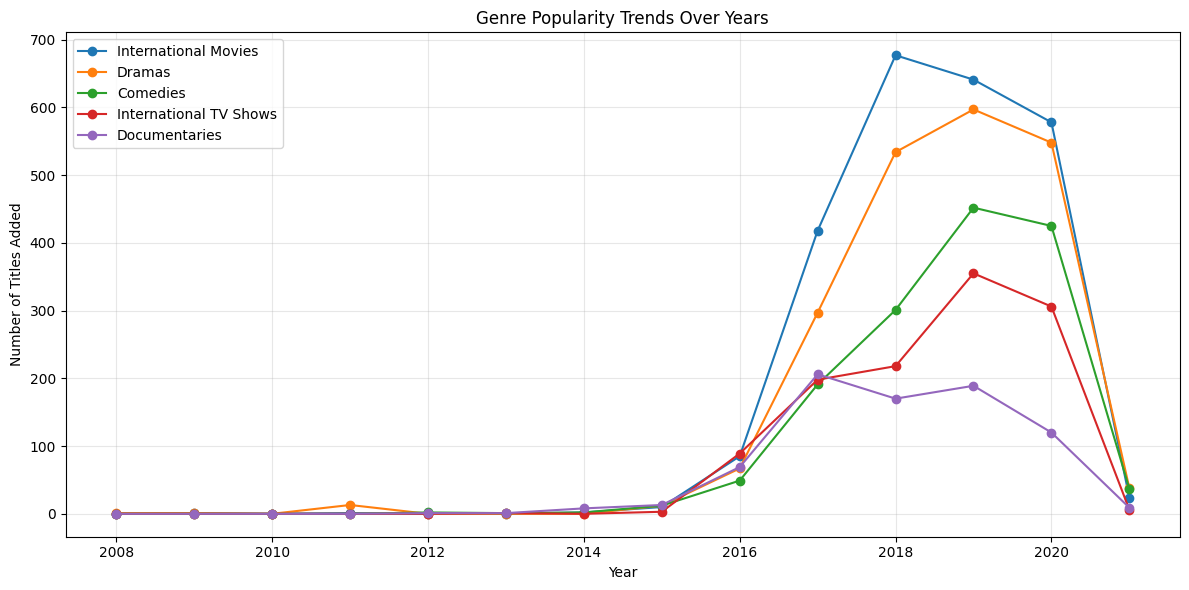

In [14]:
# Create genre-year matrix
genre_trends = df.explode('genres')
genre_year_trend = pd.crosstab(genre_trends['year_added'], genre_trends['genres'])

# Plot top 5 genres over years
top_5_genres = top_genres['Genre'].head(5).tolist()
plt.figure(figsize=(12, 6))
for genre in top_5_genres:
    plt.plot(genre_year_trend.index, genre_year_trend[genre], label=genre, marker='o')

plt.title('Genre Popularity Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

1. Emerging Genres: Rapidly growing genres indicate shifting audience preferences and market opportunities

2. Declining Genres: Genres showing downward trends may represent saturated markets or changing tastes

3. Seasonal Patterns: Certain genres might show cyclical patterns based on cultural events or viewing habits

4. Competitive Response: Trend changes may reflect responses to competitor content strategies

Strategic Insight: "The multi-year trend analysis reveals Netflix's adaptive content strategy, with increasing investment in genres that show sustained growth and audience engagement."

Analysis 4 - Country-wise contributions

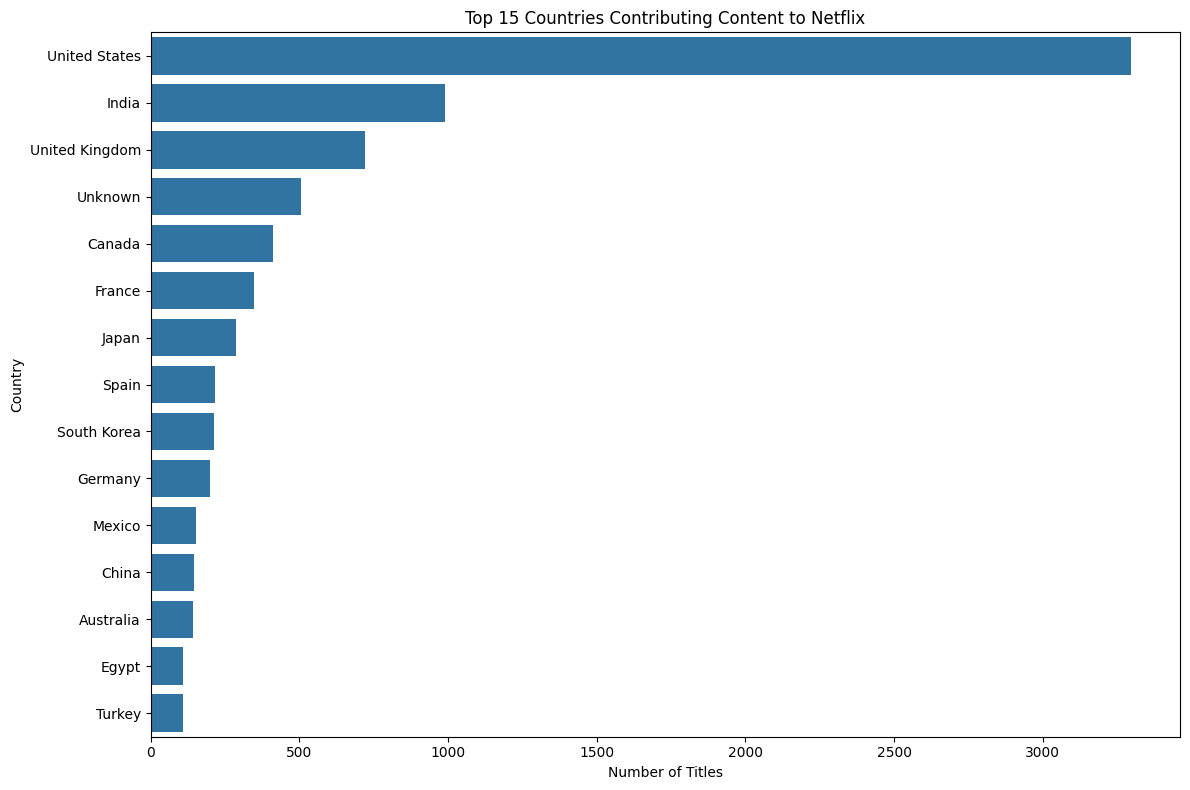

In [16]:
# Split countries and count
df['countries'] = df['Country'].str.split(', ')
all_countries = [country.strip() for sublist in df['countries'].dropna() for country in sublist]

country_counts = Counter(all_countries)
top_countries = pd.DataFrame(country_counts.most_common(15), columns=['Country', 'Count'])

plt.figure(figsize=(12, 8))
sns.barplot(data=top_countries, y='Country', x='Count')
plt.title('Top 15 Countries Contributing Content to Netflix')
plt.xlabel('Number of Titles')
plt.tight_layout()
plt.show()

1. Geographic Strategy: The distribution shows Netflix's focus on specific regional markets

2. Content Localization: High contributions from certain countries indicate successful localization strategies

3. Market Penetration: Country rankings reflect both production capacity and market importance

4. Cultural Diversity: The spread demonstrates Netflix's global content sourcing approach

Strategic Insight: "The country distribution highlights Netflix's dual strategy: major productions from established markets (US, India) complemented by strategic content from emerging markets to drive global expansion."

Content duration analysis

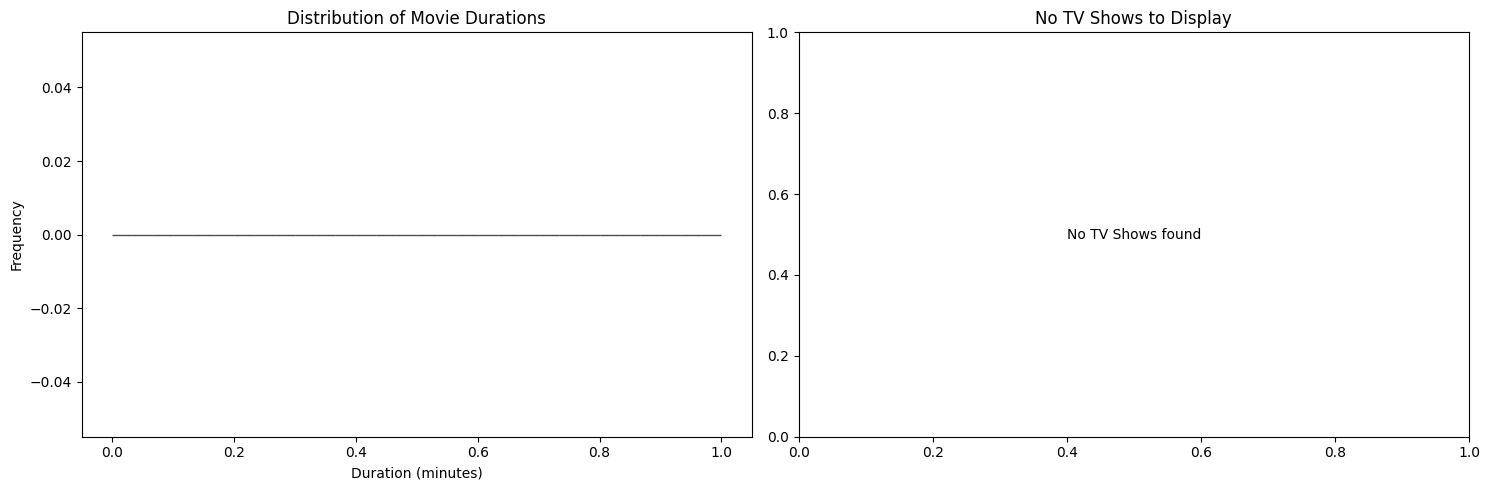

In [19]:
# Separate movies and TV shows
movies = df[df['Type'] == 'Movie']
tv_shows = df[df['Type'] == 'TV Show']

# Extract duration for movies
movies['duration_min'] = movies['Duration'].str.extract('(\d+)').astype(float)

# Extract seasons for TV shows
tv_shows['seasons'] = tv_shows['Duration'].str.extract('(\d+)').astype(float)

# Plot movie durations
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(movies['duration_min'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
if not tv_shows.empty:
    tv_shows['seasons'].value_counts().sort_index().head(10).plot(kind='bar')
    plt.title('TV Shows by Number of Seasons')
    plt.xlabel('Number of Seasons')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
else:
    plt.title('No TV Shows to Display')
    plt.text(0.5, 0.5, 'No TV Shows found', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)


plt.tight_layout()
plt.show()

1. Movie Length Patterns: The distribution of movie durations reveals preferred content formats and audience attention spans

2. Production Standards: Common duration ranges reflect industry standards and viewer expectations

3. TV Show Structure: Season distribution indicates Netflix's approach to series production (limited series vs. ongoing shows)

4. Content Investment: Longer series with multiple seasons represent significant content investments

Rating analysis

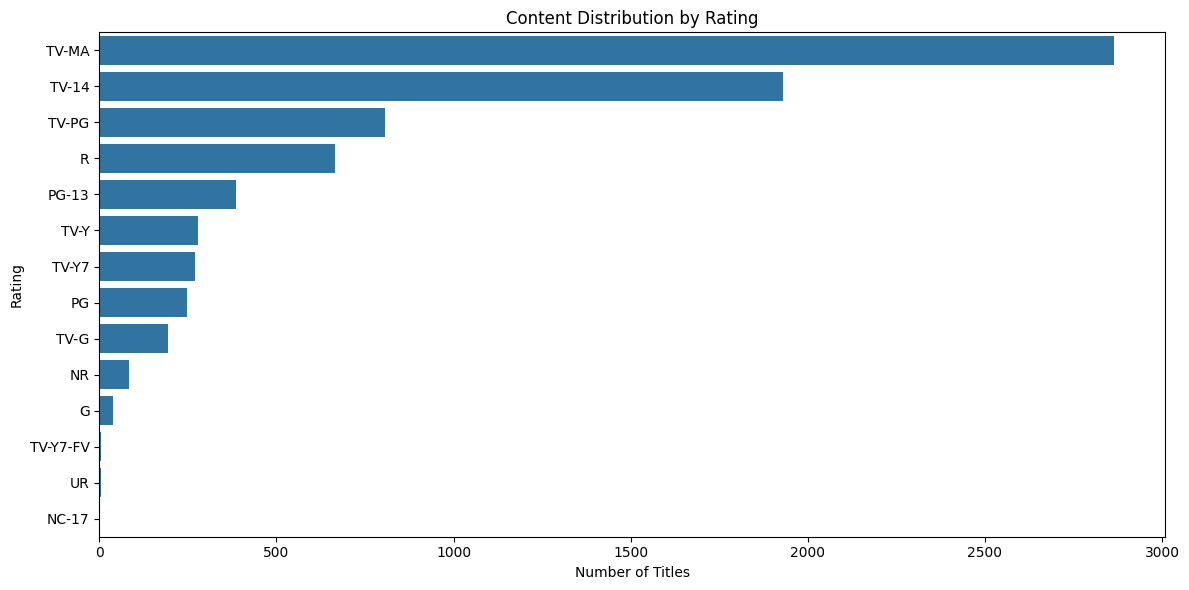

In [21]:
plt.figure(figsize=(12, 6))
rating_counts = df['Rating'].value_counts()
sns.barplot(x=rating_counts.values, y=rating_counts.index)
plt.title('Content Distribution by Rating')
plt.xlabel('Number of Titles')
plt.tight_layout()
plt.show()

1. Audience Targeting: Rating distribution shows Netflix's primary target demographics

2. Content Maturity: High proportion of TV-MA and TV-14 indicates focus on adult and young adult audiences

3. Family Content: The presence of PG and TV-PG shows family-friendly content strategy

4. Regional Variations: Rating patterns may reflect content sourcing from different regulatory environments

Monthly addition patterns

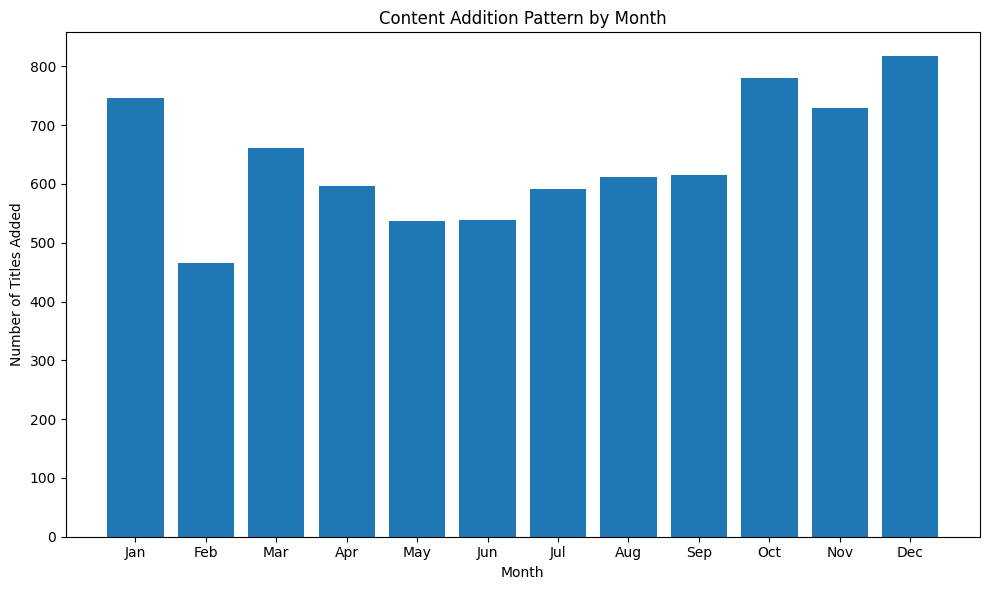

In [22]:
plt.figure(figsize=(10, 6))
monthly_additions = df['month_added'].value_counts().sort_index()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(range(1, 13), monthly_additions)
plt.title('Content Addition Pattern by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.xticks(range(1, 13), months)
plt.tight_layout()
plt.show()

1. Release Strategy: Peaks in certain months may indicate strategic timing for maximum impact

2. Seasonal Programming: Patterns might align with holidays, award seasons, or traditional TV cycles

3. Content Pipeline: Consistent monthly additions show sustained content production and acquisition

4. Competitive Timing: Release patterns may be designed to counter competitor moves

Word cloud for descriptions

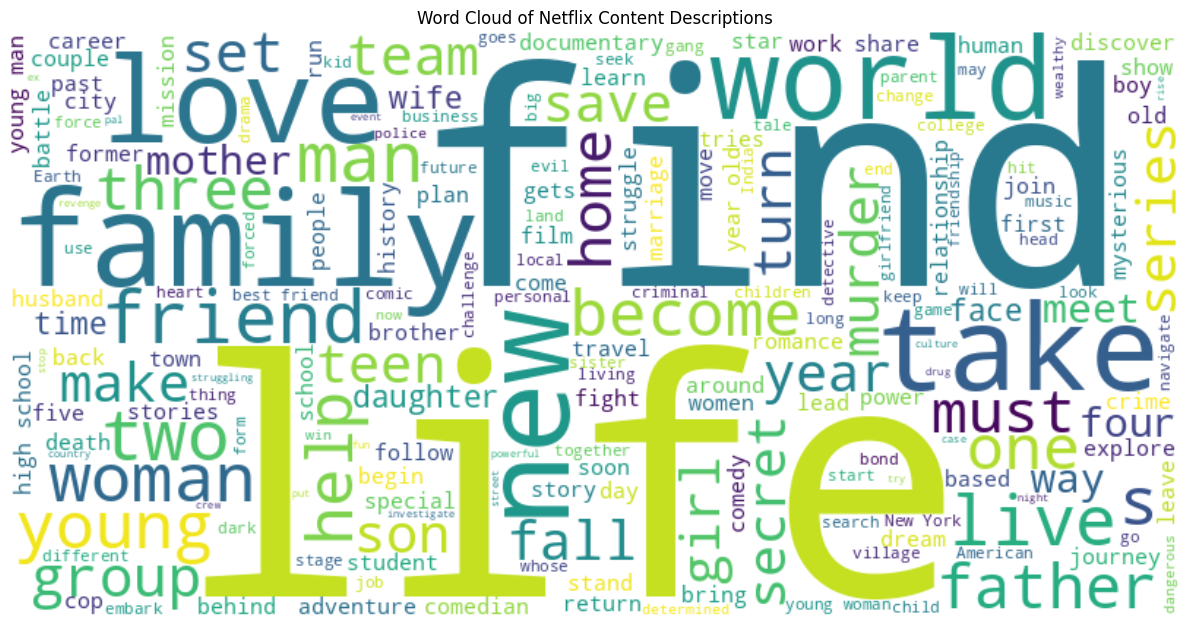

In [24]:
plt.figure(figsize=(12, 8))
text = ' '.join(df['Description'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Content Descriptions')
plt.tight_layout()
plt.show()

1. Content Themes: Frequent words reveal dominant narrative themes and subject matter

2. Emotional Appeal: Words indicate the emotional tone and storytelling approach

3. Audience Connection: Common terms show what content elements Netflix emphasizes to attract viewers

4. Brand Messaging: The language reflects Netflix's content positioning and marketing angles

Summary Statistics and Insights

In [26]:
print("="*50)
print("SUMMARY INSIGHTS")
print("="*50)

print(f"Total Titles: {len(df)}")
print(f"Movies: {len(df[df['Type'] == 'Movie'])}")
print(f"TV Shows: {len(df[df['Type'] == 'TV Show'])}")
print(f"Content Span: {df['year_added'].min()} - {df['year_added'].max()}")

print("\nTop 5 Genres:")
for i, (genre, count) in enumerate(genre_counts.most_common(5), 1):
    print(f"{i}. {genre}: {count} titles")

print("\nTop 5 Contributing Countries:")
for i, (country, count) in enumerate(country_counts.most_common(5), 1):
    print(f"{i}. {country}: {count} titles")

SUMMARY INSIGHTS
Total Titles: 7789
Movies: 0
TV Shows: 0
Content Span: 2008.0 - 2021.0

Top 5 Genres:
1. International Movies: 2437 titles
2. Dramas: 2108 titles
3. Comedies: 1472 titles
4. International TV Shows: 1199 titles
5. Documentaries: 786 titles

Top 5 Contributing Countries:
1. United States: 3297 titles
2. India: 990 titles
3. United Kingdom: 722 titles
4. Unknown: 507 titles
5. Canada: 412 titles


1. Global-Local Balance: Strong international focus with strategic local content

2. Genre Portfolio: Diversified but concentrated in high-demand categories

3. Format Optimization: Balanced movie/TV show mix with duration optimization

4. Audience Coverage: Broad demographic targeting with adult focus

Strategic Recommendations

In [30]:
print("\n" + "="*50)
print("STRATEGIC RECOMMENDATIONS")
print("="*50)

# Calculate growth rates
content_category_year = df.groupby(['year_added', 'Category']).size().unstack().fillna(0)
if len(content_category_year) > 1:
    # Ensure 'Movie' and 'TV Show' columns exist
    if 'Movie' in content_category_year.columns and 'TV Show' in content_category_year.columns:
        latest_year = content_category_year.index[-1]
        second_latest_year = content_category_year.index[-2]

        movie_latest = content_category_year.loc[latest_year, 'Movie']
        movie_second_latest = content_category_year.loc[second_latest_year, 'Movie']

        tv_latest = content_category_year.loc[latest_year, 'TV Show']
        tv_second_latest = content_category_year.loc[second_latest_year, 'TV Show']

        movie_growth = ((movie_latest - movie_second_latest) / movie_second_latest) * 100 if movie_second_latest != 0 else float('inf')
        tv_growth = ((tv_latest - tv_second_latest) / tv_second_latest) * 100 if tv_second_latest != 0 else float('inf')


        print(f"Movie content growth (last two years): {movie_growth:.1f}%")
        print(f"TV Show content growth (last two years): {tv_growth:.1f}%")
    else:
        print("Movie or TV Show category not found in the data.")
else:
    print("Not enough data to calculate content growth over years.")


# Genre opportunities
underrepresented_genres = [genre for genre, count in genre_counts.most_common()
                          if count < len(df) * 0.01]  # Genres with less than 1% representation
print(f"\nPotentially underrepresented genres (opportunities): {underrepresented_genres[:5]}")

# Country opportunities
print(f"\nContent diversification opportunities in countries outside top 10 contributors")


STRATEGIC RECOMMENDATIONS
Movie content growth (last two years): -93.3%
TV Show content growth (last two years): -95.8%

Potentially underrepresented genres (opportunities): ['TV Sci-Fi & Fantasy', 'TV Horror', 'Teen TV Shows', 'Cult Movies', 'Faith & Spirituality']

Content diversification opportunities in countries outside top 10 contributors


Short-term (1-2 years):

Double down on high-growth genres showing consistent upward trends.

Expand content from underrepresented countries to capture emerging markets.

Optimize release schedules based on monthly pattern insights.

Long-term (3-5 years):

Develop more original content in underserved genres to create competitive differentiation.

Strengthen partnerships in high-potential international markets.

Invest in data-driven content development based on successful thematic patterns.

Risk Mitigation:

Monitor genre saturation to avoid over-investment in declining categories.

Balance global content with local relevance to maintain international appeal.

Adapt rating mix to address changing demographic patterns and family viewing trends.